In [1]:
%run statistics.ipynb

3.0.0
   chance  player_score  player_cards  player_aces  dealer_score  dealer_cards  dealer_aces   2   3   4   5   6   7   8   9  10  11
0     1.0            10             2            0             9             1            0  24  24  24  24  24  24  24  24  96  24
Calculating possible returns for each game...
Bust games: 80.00%
game
             chance  player_score  player_cards  player_aces  dealer_score  dealer_cards  dealer_aces   2   3   4  ...  drawn_1  drawn_2  drawn_3  drawn_4  drawn_5  drawn_6  drawn_7  drawn_8  drawn_9  drawn_10
0     1.000000e+00            10             2            0             9             1            0  24  24  24  ...        0        0        0        0        0        0        0        0        0         0
1     7.692308e-02            12             3            0             9             1            0  23  24  24  ...        2        0        0        0        0        0        0        0        0         0
2     7.692308e-02            13

In [2]:
ret = get_best_return_updated(get_game(get_deck(1), [9,9], [9], update_deck=False))
ret

stand        -0.18042
hit         -0.613787
double      -1.227575
surrender        -0.5
best            stand
dtype: object

In [3]:
# hand scores
dealer = np.arange(2,12)
hard = np.arange(5,22)
soft = np.arange(13,22)
pairs = np.tile(np.arange(2,12).reshape(-1,1), 2)

In [4]:
df = pd.DataFrame(
    np.zeros((len(hard), len(dealer))),
    index=hard,
    columns=dealer
)

hard_hands = {
    "stand": df.copy(),
    "hit": df.copy(),
    "double": df.copy(),
    "surrender": df.copy(),
    "best": df.copy()
} 

In [5]:
assert np.all(hard_hands["hit"] == 0.0), "values present"

for dealerscore in dealer:
    for playerscore in hard:
        print("Dealerscore", dealerscore, "Playerscore", playerscore)
        game = get_game(None, [np.ceil(playerscore/2).astype(int), np.floor(playerscore/2).astype(int)], [dealerscore], False)
        br = get_best_return_updated(game)
        print(br)
        
        hard_hands["stand"].loc[playerscore, dealerscore] = br["stand"]
        hard_hands["hit"].loc[playerscore, dealerscore] = br["hit"]
        hard_hands["double"].loc[playerscore, dealerscore] = br["double"]
        hard_hands["surrender"].loc[playerscore, dealerscore] = br["surrender"]
        hard_hands["best"].loc[playerscore, dealerscore] = br["best"]


Dealerscore 2 Playerscore 5
stand       -0.293224
hit         -0.128696
double      -0.586447
surrender        -0.5
best              hit
dtype: object
Dealerscore 2 Playerscore 6
stand       -0.293224
hit         -0.141081
double      -0.564983
surrender        -0.5
best              hit
dtype: object
Dealerscore 2 Playerscore 7
stand       -0.293224
hit         -0.109294
double      -0.436443
surrender        -0.5
best              hit
dtype: object
Dealerscore 2 Playerscore 8
stand       -0.293224
hit         -0.021522
double      -0.204719
surrender        -0.5
best              hit
dtype: object
Dealerscore 2 Playerscore 9
stand       -0.293224
hit          0.074852
double       0.061414
surrender        -0.5
best              hit
dtype: object
Dealerscore 2 Playerscore 10
stand       -0.293224
hit          0.182982
double       0.359793
surrender        -0.5
best           double
dtype: object
Dealerscore 2 Playerscore 11
stand       -0.293224
hit          0.239175
double        

Text(0.5, 0, "Dealer's card")

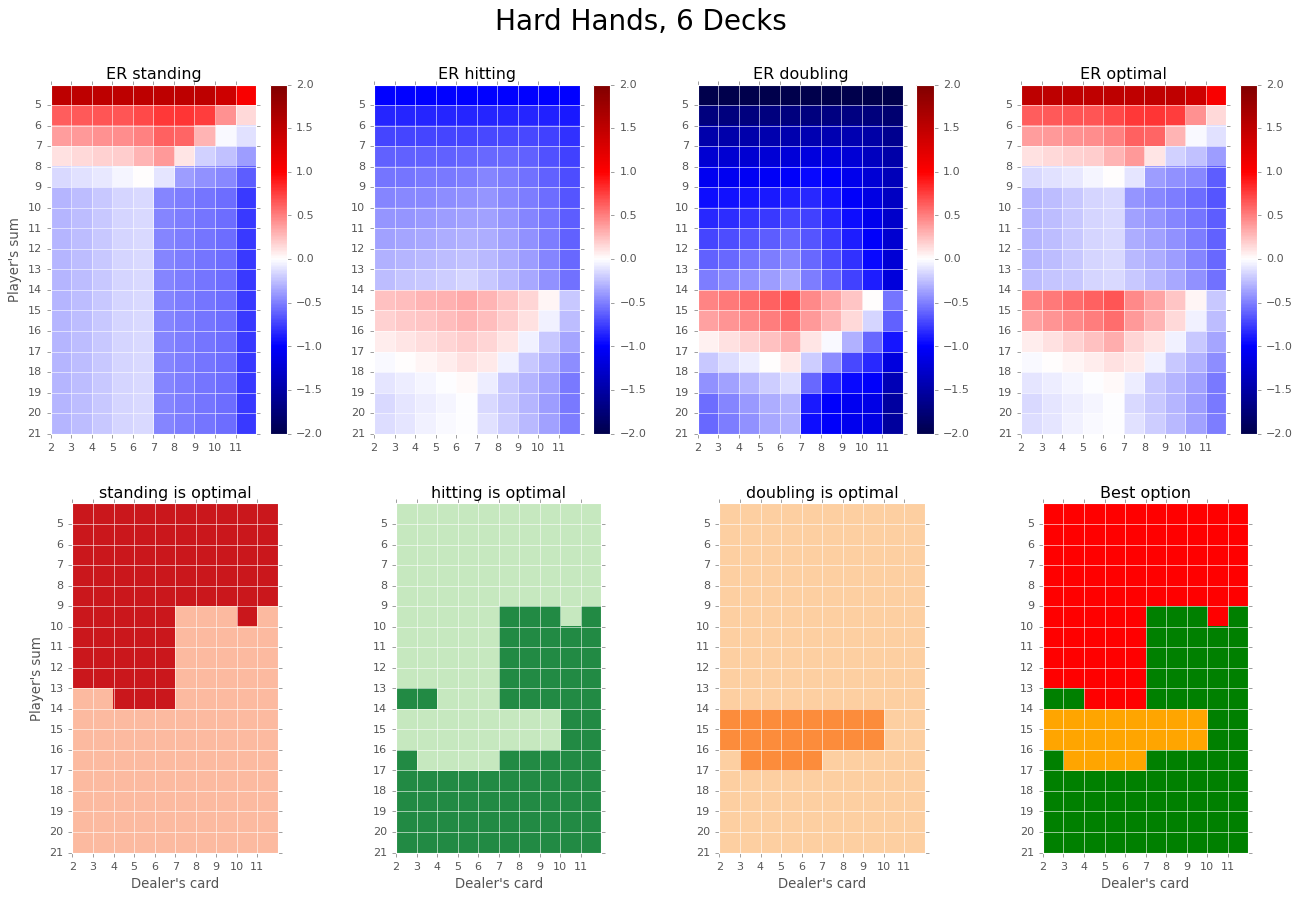

In [125]:
from matplotlib import pyplot as plt
from matplotlib import colors

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [20, 12]

divnorm=colors.TwoSlopeNorm(vmin=-2, vcenter=0., vmax=2)
extent = [0,len(hs.columns),0,len(hs.index)]

fig, ax = plt.subplots(2,4)
fig.suptitle("Hard Hands, 6 Decks", fontsize=25)

hs = hard_hands["stand"].iloc[::-1,:].copy()
hh = hard_hands["hit"].iloc[::-1,:].copy()
hd = hard_hands["double"].iloc[::-1,:].copy()
hb = hard_hands["best"].iloc[::-1,:].copy()
best = pd.DataFrame(np.maximum(np.maximum(hs.values.copy(), hh.values.copy()), hd.values.copy()).copy(), columns=hs.columns, index=hs.index)

ax[0][0].set_title("ER standing")
im = ax[0][0].imshow(hs, interpolation="none", cmap="seismic", norm=divnorm, extent=extent)
fig.colorbar(im, ax=ax[0][0])
ax[0][0].set_xticks(np.arange(len(hs.columns)), hs.columns)
ax[0][0].set_yticks(np.arange(len(hs.index)), hs.index)
ax[0][0].set_ylabel("Player's sum")

ax[1][0].set_title("standing is optimal")
im = ax[1][0].imshow(((hs == best)*2)-1, interpolation="none", cmap="Reds", norm=divnorm, extent=extent)
ax[1][0].set_xticks(np.arange(len(hs.columns)), hs.columns)
ax[1][0].set_yticks(np.arange(len(hs.index)), hs.index)
ax[1][0].set_xlabel("Dealer's card")
ax[1][0].set_ylabel("Player's sum")

ax[0][1].set_title("ER hitting")
im = ax[0][1].imshow(hh, interpolation="none", cmap="seismic", norm=divnorm, extent=extent)
fig.colorbar(im, ax=ax[0][1])
ax[0][1].set_xticks(np.arange(len(hh.columns)), hh.columns)
ax[0][1].set_yticks(np.arange(len(hh.index)), hh.index)

ax[1][1].set_title("hitting is optimal")
im = ax[1][1].imshow(((hh == best)*2)-1, interpolation="none", cmap="Greens", norm=divnorm, extent=extent)
ax[1][1].set_xticks(np.arange(len(hh.columns)), hh.columns)
ax[1][1].set_yticks(np.arange(len(hh.index)), hh.index)
ax[1][1].set_xlabel("Dealer's card")

ax[0][2].set_title("ER doubling")
im = ax[0][2].imshow(hd, interpolation="none", cmap="seismic", norm=divnorm, extent=extent)
fig.colorbar(im, ax=ax[0][2])
ax[0][2].set_xticks(np.arange(len(hd.columns)), hd.columns)
ax[0][2].set_yticks(np.arange(len(hd.index)), hd.index)

ax[1][2].set_title("doubling is optimal")
im = ax[1][2].imshow((hd == best)-1, interpolation="none", cmap="Oranges", norm=divnorm, extent=extent)
ax[1][2].set_xticks(np.arange(len(hd.columns)), hd.columns)
ax[1][2].set_yticks(np.arange(len(hd.index)), hd.index)
ax[1][2].set_xlabel("Dealer's card")

ax[0][3].set_title("ER optimal")
im = ax[0][3].imshow(best, interpolation="none", cmap="seismic", norm=divnorm, extent=extent)
fig.colorbar(im, ax=ax[0][3])
ax[0][3].set_xticks(np.arange(len(hs.columns)), hs.columns)
ax[0][3].set_yticks(np.arange(len(hs.index)), hs.index)

ax[1][3].set_title("Best option")
data = (hs == best) * 1 + (hh == best) * 2 + (hd == best) * 3
ax[1][3].imshow(data, interpolation="none", cmap=colors.ListedColormap(['red', 'green', 'orange']), extent=extent)
ax[1][3].set_xticks(np.arange(len(hs.columns)), hs.columns)
ax[1][3].set_yticks(np.arange(len(hs.index)), hs.index)
ax[1][3].set_xlabel("Dealer's card")



### ISSUES:
- player = 16 and dealer = 10 should be hit
- player = 10 and dealer == 11 should be double
- maybe works with less decks? or more decks?

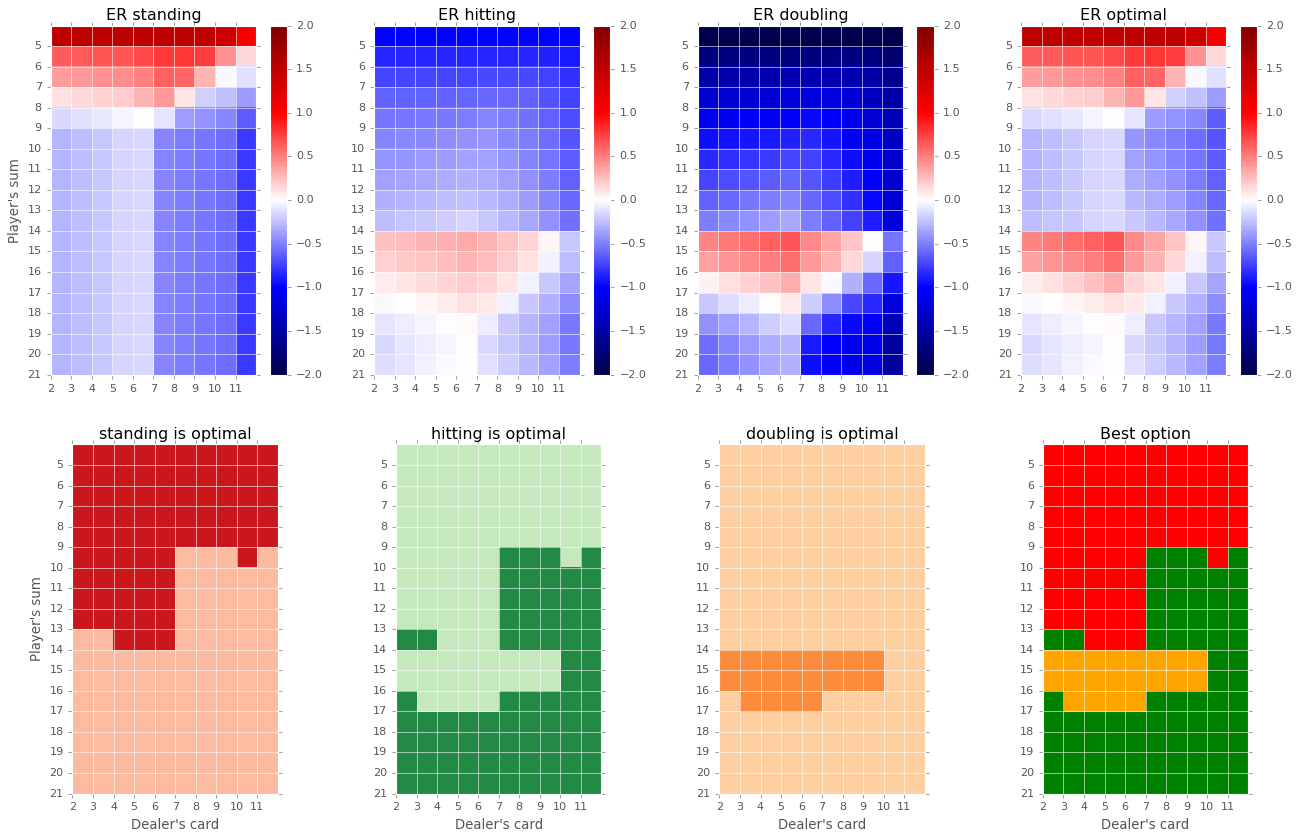
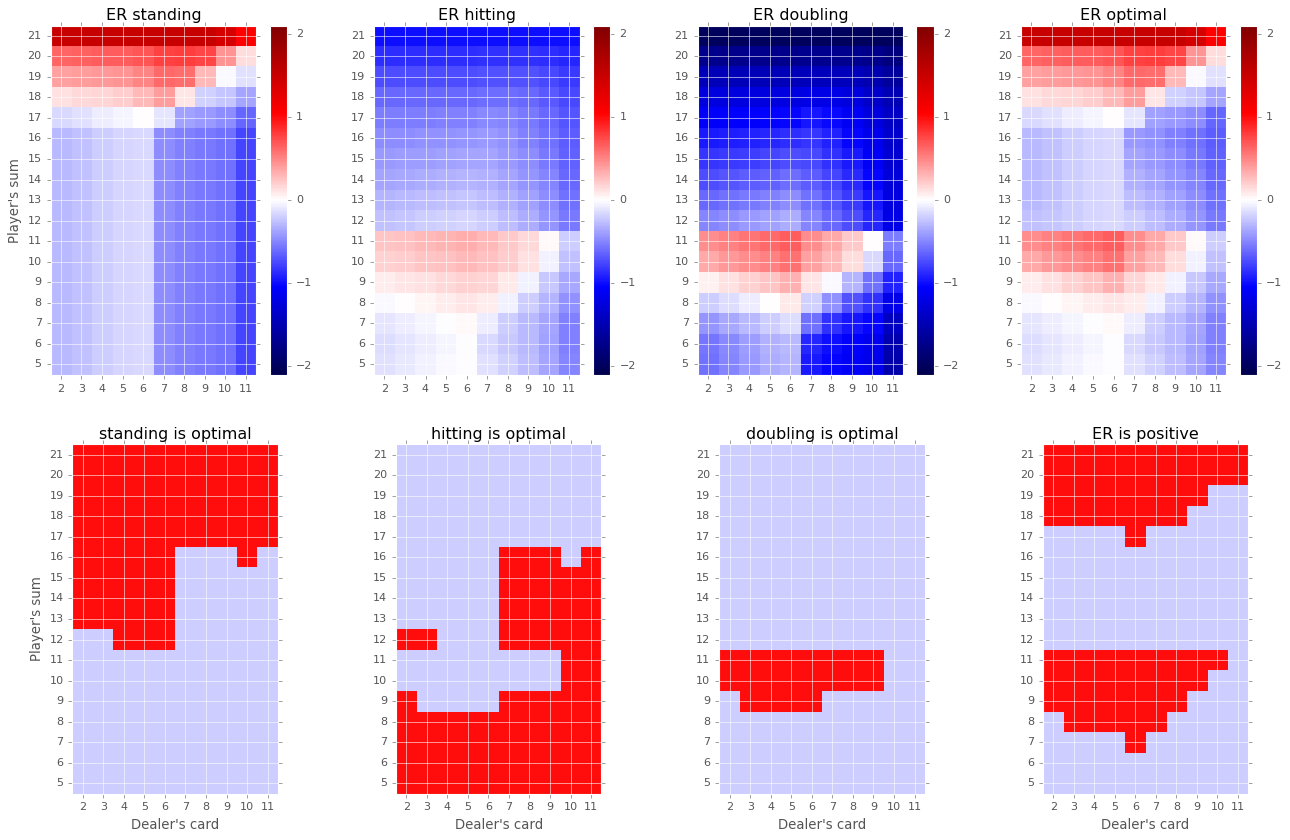

In [8]:
# hard hands
hard_hitting = pd.DataFrame(
    np.zeros((len(hard), len(dealer))), 
    index=hard,
    columns=dealer)
for dealerscore in hard_hitting.columns:
    print("Dealerscore", dealerscore)
    for playerscore in hard_hitting.index:
        game = get_game(deck, [2, playerscore-2], [dealerscore], False)
        hard_hitting.loc[playerscore, dealerscore] = get_return_chances_hitting_once(game)["expected_return"]
hard_hitting

Dealerscore 2


NameError: name 'deck' is not defined

In [ ]:
hard_standing-hard_hitting

,2,3,4,5,6,7,8,9,10
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
